In [24]:
from keras.datasets import imdb
import numpy as np

In [25]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data[0:]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [65]:
#decoding the review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [27]:
#Processing the input integer arrays as one hot 
def vectorize_sequences(data,words=10000):
  result = np.zeros((len(data),words))
  for i,j in enumerate(data):
    result[i,j] = 1
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer= 'rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [31]:
valid_train = x_train[:10000]
valid_labels = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(valid_train,valid_labels))

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

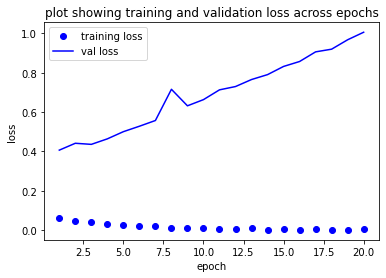

In [ ]:
#Plotting training and validation loss
import matplotlib.pyplot as plt

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,train_loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='val loss')
plt.title('plot showing training and validation loss across epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


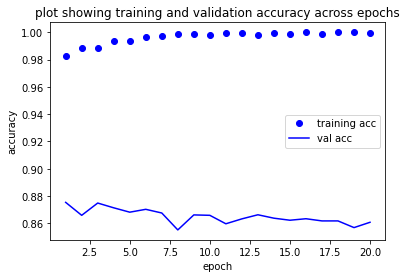

In [ ]:
#Plotting training and validation accuracy
import matplotlib.pyplot as plt

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,train_acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='val acc')
plt.title('plot showing training and validation accuracy across epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [32]:
#Retraining the model
model = models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(partial_x_train,partial_y_train,epochs=3,batch_size=512,validation_data=(valid_train,valid_labels))

Epoch 1/3
30/30 [==============================] - 2s 49ms/step - loss: 0.6476 - accuracy: 0.5753 - val_loss: 0.5640 - val_accuracy: 0.7981
Epoch 2/3
30/30 [==============================] - 1s 35ms/step - loss: 0.5210 - accuracy: 0.8222 - val_loss: 0.4764 - val_accuracy: 0.8719
Epoch 3/3
30/30 [==============================] - 1s 35ms/step - loss: 0.4148 - accuracy: 0.9007 - val_loss: 0.3821 - val_accuracy: 0.8700


In [35]:
result = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3944 - accuracy: 0.8596


In [100]:
#Coding the review. And predicting on your own custom reviews

review = "The movie was really bad. The actors were just awful. The story was very badly directed and didn't convey any message. It was justlike a nonsense film with no substance. I wonder how anyone could agree to direct such a story. I hope it doesn't hurt anybody's feeling. But it really could not bring anyone take home anything positive and meaningful. I think it was just made up to gain some revenue. However I regret coming here. I hope nobody wastes their time money watching it."
review2 = "It was such a thrilling movie. No one could predict anything that was happening. A really well written and directed mobie. Kudos to the director! I personally recommend this movie to anyone who likes watching thrilling action packed movies. Any movie that leaves its audience mermerised in a way that they cannot comprehend is a real movie. Such films ar made once in a decade and definetly this is one of them. I wonder how could one think of such a thrilling and mind blowing story."
#review3 = "This film was just brilliant. The casting location, scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director. My father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great. it was just brilliant so much that i bought the film as soon as it was released for 12 and would recommend it to everyone to watch and the fly fishing was amazing. I really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also related to the two little boy's that played the role of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all."
review3 ="? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"
review4 ="I’ve seen JACK REACHER for bad a month now. Why should you ugly two shits about this film? Well, it is awful on a series of books by Lee Child that has huge fans. Reacher is essentially the most badass Military Detective that there ever was. He found problems. That life is in the rearview and now he wanders the earth like Kane from Kung Fu having adventures. Now, there’s no Eastern philosophy. In fact if you watch Cruise’s Jack Reacher… efficient & precise describe his actions, dialogue and line of thought. Shortest distances. He keeps things explosive, even if they’re barbs of the verbal side. You should not be surprised. JACK REACHER is an old school man with internally created way of life...Living day by day the way he lives. Now I know, I’ve brought up THE OUTLAW JOSEY WALES so I assume you have to want to know, what’s better? Well, OUTLAW JOSEY WALES. Duh. This film is called JACK REACHER and after you see it, you’ll know the name and what it stands for."


def code_review(review):
  ls=[]
  for i in review.split(' '):
    #print(word_index.keys())
    if i in word_index.keys():
      ls.append(word_index[i])
  ls = np.array(ls)
  review = ' '.join([reverse_word_index.get(i,'?') for i in ls])
  print(review)
  arr = np.zeros(10000)
  for i in ls:
    if i>10000:
      break
    arr[i]=1
  return arr

arr = code_review(review)



movie was really actors were just story was very badly directed and didn't convey any was a nonsense film with no wonder how anyone could agree to direct such a hope it doesn't hurt anybody's it really could not bring anyone take home anything positive and think it was just made up to gain some regret coming hope nobody wastes their time money watching


In [101]:
model.predict(arr.reshape(1,10000))
#x_test[0].reshape(1,10000)


array([[0.3806337]], dtype=float32)